In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

%config InlineBackend.figure_format = 'retina'

In [2]:
from plotting.basic import *
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data_path = '../../../../results/data/real_networks/'

In [4]:
def load(file):
    with open(data_path + file, 'rb') as f:
        result = np.load(f)
    f.close()
    return result

In [5]:
networks = ["Avogato", "Facebook", "Flickr", "Twitter"]
outcomes = ["total_consensus", "clustering", "dissensus", "polarisation"]

In [6]:
all_results = []
for network in networks:
    results = []
    for outcome in outcomes:
        results.append(load(network + "/" + outcome + ".npy"))
    all_results.append(results)


/Users/martinprieto/Desktop/New_Honours_Refactored/src/plotting/basic.py:84: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  return ax.imshow(histogram.T, aspect="auto", interpolation=interpolation , vmax=np.quantile(histogram, qmax))


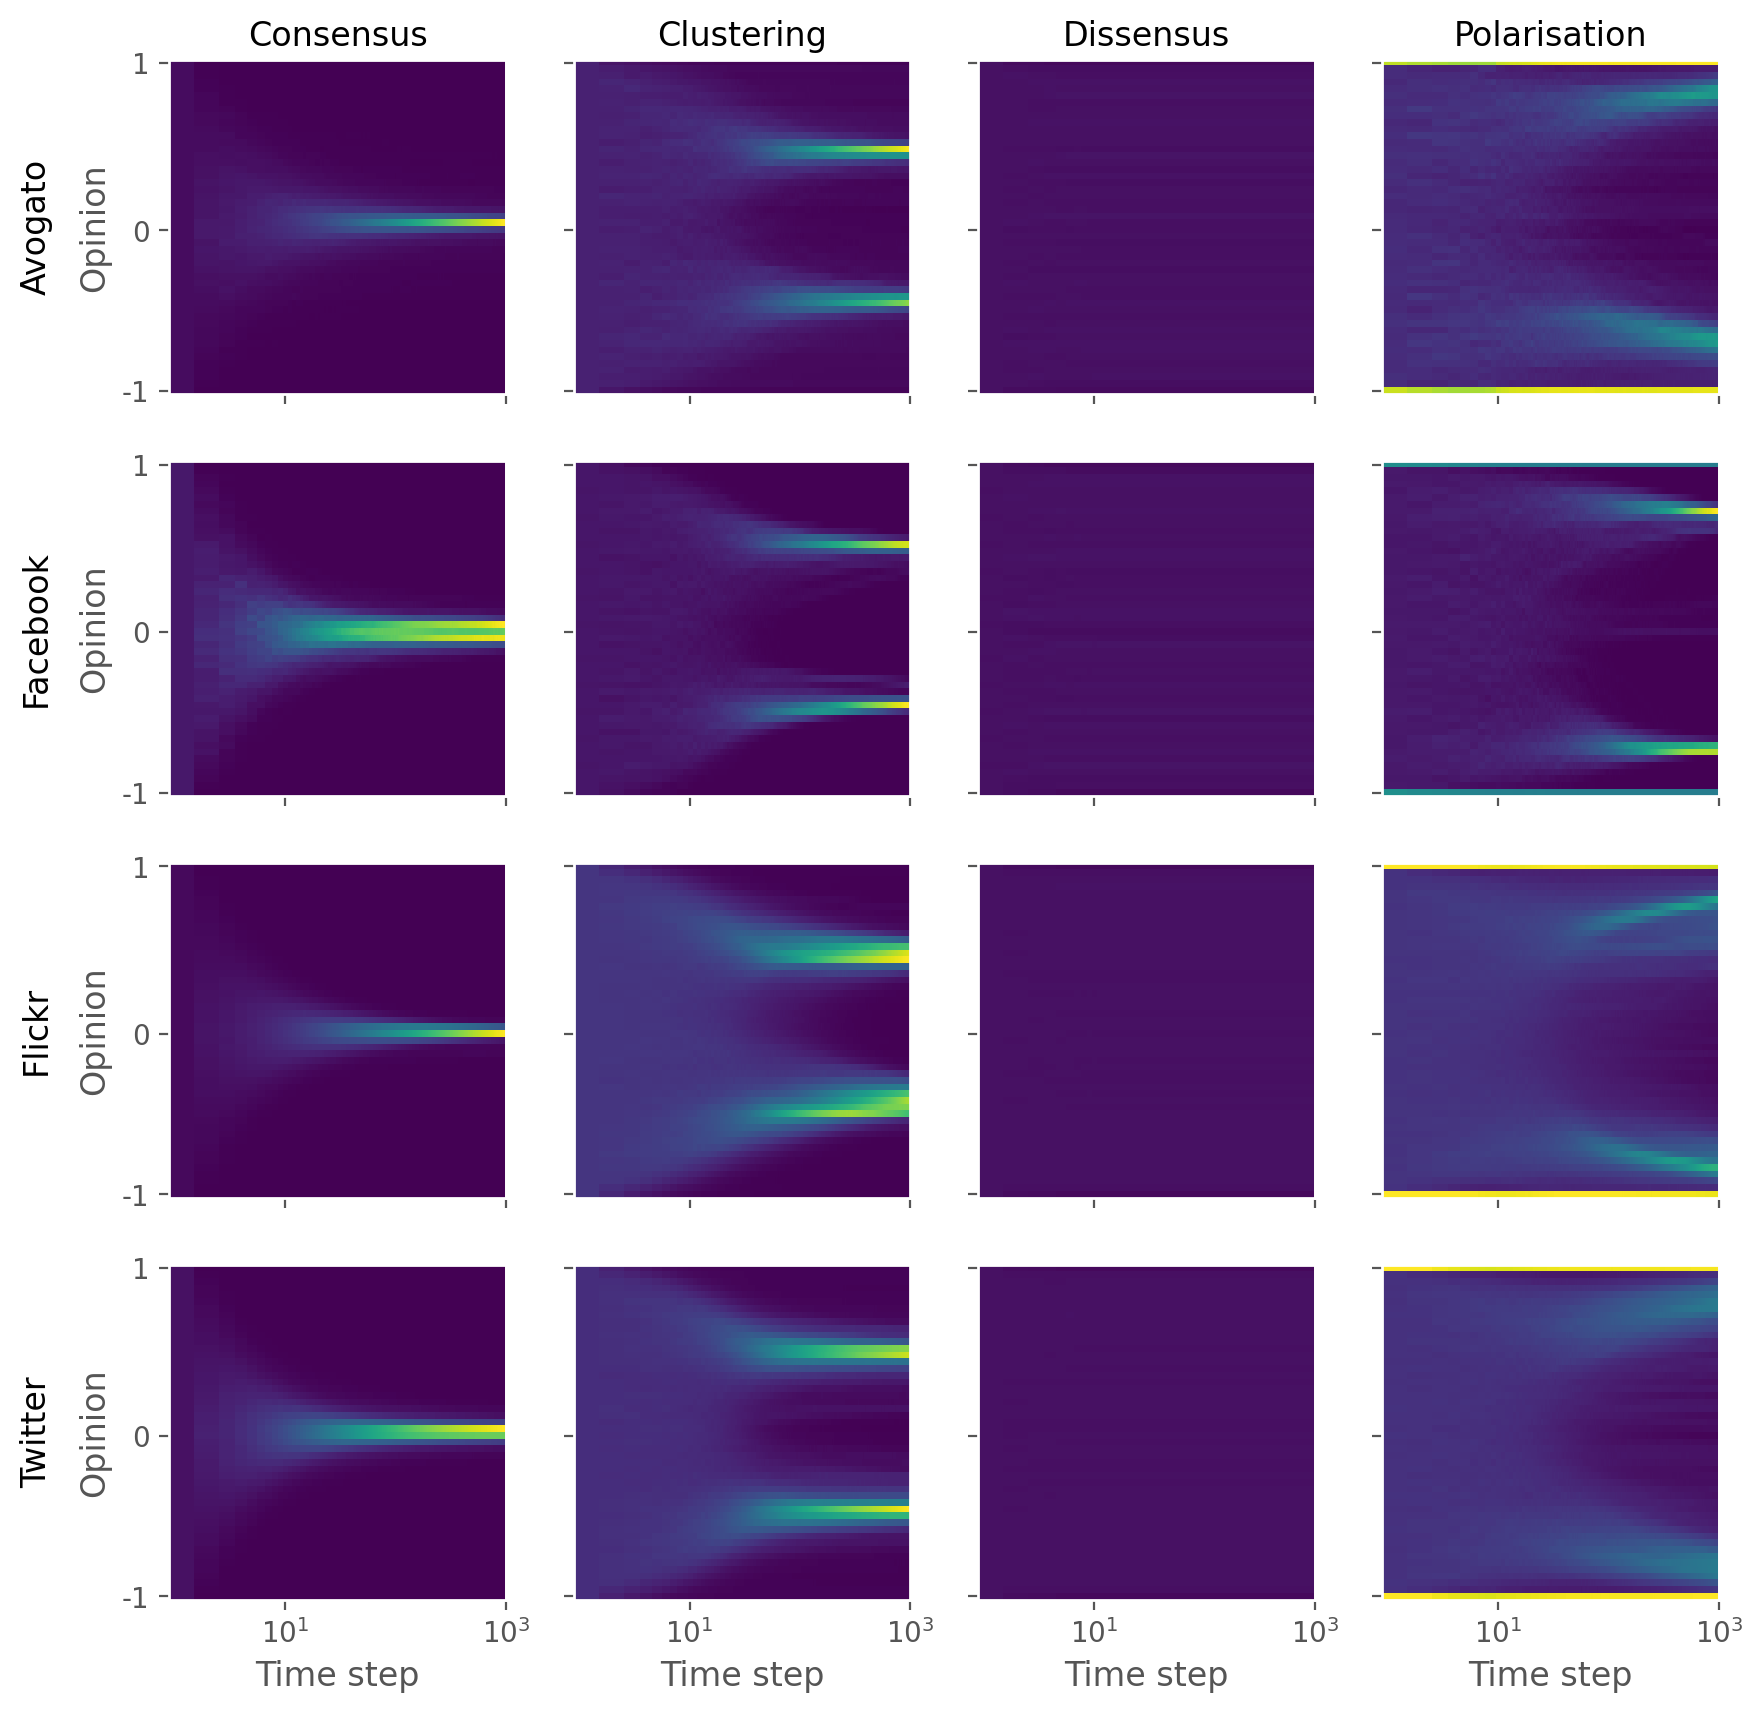

In [10]:
x_num = len(networks)
y_num = len(outcomes)
fig, axs = plt.subplots(x_num, y_num, sharex=True, sharey=True, figsize=[10,10])

for i in range(x_num):
        for e in range(y_num):
            qmax = 0.999
            if e == 2:
                qmax = 0.999989
            beliefs = all_results[i][e]
            im = ax_plot_density_of_opinions(beliefs, axs[i,e], qmax=qmax, interpolation="None")

pad = 5
outcomes = ["Consensus", "Clustering", "Dissensus", "Polarisation"]

for ax, col in zip(axs[0], outcomes):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
            xycoords='axes fraction', textcoords='offset points',
            size='large', ha='center', va='baseline')
    
for ax, row in zip(axs[:,0], networks):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
        xycoords=ax.yaxis.label, textcoords='offset points',
        size='large', ha='right', va='center', rotation="vertical")
    
for ax in axs.flat:
        ax.set(xlabel='Time step', ylabel='Opinion')
    
for ax in axs.flat:
    ax.label_outer()

plt.savefig('../../../../results/plots/Results/RealNetworks/opinion_densities.pdf',bbox_inches="tight" )